# **Ejercicio 1**

## **Ejercicio Notas de Clase**
Considere los ejemplos vistos en clase, en los que se analizó la implementación de los modelos: *k-nn*, *regresión lineal*, *regresión logística*. Realice hiperparametrización y validación cruzada usando *(i) GridSearchCV y Pipeline vs (ii) Manualmente, sin usar GridSearchCV y Pipeline (Use ciclos FOR, WHILE, etc,...)*. Verifique que los scores obtenidos en los ítems *(i)-(ii)* son los mismos. Los ejercicios son los siguientes:

-  Breast Cancer: (KNN, LogisticRegression) Decida cual es la métrica de mayor importancia en la aplicación de detección de cancer (métrica de negocio). Utilice esta métrica para la evaluación y selección del modelo y justifique su respuesta. Los resultados deben ser presentados usando el Cuadro 1. El estudiante que obtenga el mejor score con esta métrica, será premiado con una décima para el corte. Los datos deben ser cargados mediante el siguiente par de líneas:

        • from sklearn.datasets import load_breast_cancer
        • cancer = load_breast_cancer()

- Boston Housing: (LinearRegression, KNN). Utilice la métrica R2 y RMSE durante la evaluación y selección del modelo. Los resultados deben ser presentados usando el Cuadro 2. Realice un gráfico en el que muestre en los conjuntos de entrenamiento y test, el precio original y el predicho. El estudiante que obtenga el mejor score con esta métrica, será premiado con una décima para el corte. Los datos deben ser cargados mediante el siguiente par de líneas:

        • import mglearn
        • X, y = mglearn.datasets.load_extended_boston())

**Cuadro 1: Modelo de clasificación para detección de fraude**

| **Modelo**            | **precision** | **recall** | **f1-score** | **AUC** |
|-----------------------|---------------|------------|--------------|---------|
| K-NN                  | ...        | ...          | ...           | ...       |
| Logistic Regression   | ...           | ...          | ...            | ...       |






**Cuadro 2: Modelo de regresión para velocidad del viento**

| **Modelo**            | **MAPE** | **MAE** | **RMSE** | **MSE** | **R2** |
|-----------------------|----------|---------|----------|---------|--------|
| K-NN                  | ...      | ...      | ...       | ...      | ...     |
| Linear Regression     | ...      | ...      | ...       | ...      | ...     |





## **Librerias y módulos necesarios**

In [269]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
import mglearn
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")


## **Breast Cancer**

En este caso, contamos con un conjunto de datos sobre el cáncer de mama (`Breast Cancer`). Nótese que al tratarse de un tema de salud crítico, es de vital importancia escoger la métrica más acertada para asegurarnos de dar las mejores estimaciones. Es por ello, que en este caso, decidimos trabajar con *`Recall`*. Esta métrica nos permitirá limitar los falsos negativos, es decir, aquellas observaciones que en realidad SI tienen cáncer pero en realidad fueron predichas como que NO tienen. 



Inicialmente se hace el cargue del conjunto de datos. 

In [270]:
data_cancer = load_breast_cancer() # Datos
X =  data_cancer.data # Características
y = data_cancer.target # Etiquetas

### **Método GridSearchCV**

#### **GridSearchCV K-NN**

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 11)
# Stratify = y : Asegura que la proporción de clases se mantenga en los conjuntos de entrenamiento y prueba respecto a las etiquetas. 

In [272]:
# Se usa el pipeline donde primero se escala las características de los datos
# Luego se ajusta el modelo de clasificación

# Preprocesamiento: Escalación
# Clasificación: Modelo

pipeline_knn = Pipeline([('scaler', MinMaxScaler()), ('clasificador', KNeighborsClassifier())]) 

# Se usa el param_grid para definir los hiperparámetros de los modelos a evaluar.
param_grid_knn = [{ 'clasificador__n_neighbors': range(2 , 12), # Número de vecinos del modelo
                   'clasificador__weights': ['uniform', 'distance']}] 

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

# Aplicación del método GridSearchCV para KNN
grid_met = GridSearchCV(pipeline_knn, param_grid_knn, cv = kf, scoring = 'recall')
grid_met.fit(X_train, y_train)
print("Mejores parámetros:", grid_met.best_params_)
print("Mejor Recall en conjunto de entrenamiento: ",grid_met.best_score_)
y_pred = grid_met.predict(X_test)
recall = recall_score(y_test, y_pred)
print('Mejor Recall en conjunto de test:', recall)

Mejores parámetros: {'clasificador__n_neighbors': 11, 'clasificador__weights': 'uniform'}
Mejor Recall en conjunto de entrenamiento:  0.992522711390636
Mejor Recall en conjunto de test: 1.0


#### **GridSearchCV Regresión logística**

In [273]:
# MinMaxScaler: para normalizar nuestros datos entre 0 y 1
pipeline_rl = Pipeline([ ('scaler', MinMaxScaler()), ('clasificador', LogisticRegression())])
param_grid_lr = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)
grid_rl = GridSearchCV(pipeline_rl, param_grid_lr, cv = kf, scoring = 'recall')
grid_rl.fit(X_train, y_train)
print("Mejor parámetro:", grid_rl.best_params_)
print("Mejor Recall en conjunto de entrenamiento:", grid_rl.best_score_)
y_pred_lr = grid_rl.predict(X_test)
recall_lr = recall_score(y_test, y_pred_lr)
print('Mejor Recall en conjunto de test:', recall_lr)


Mejor parámetro: {'clasificador__C': 0.01}
Mejor Recall en conjunto de entrenamiento: 1.0
Mejor Recall en conjunto de test: 1.0


### **GridSearch Manual**

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 11)

In [275]:
def validacion_cruzada(modelo, X_train, y_train):
    scores = [] 
    stratify_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)
    scaler = MinMaxScaler()
   
    for t_index, v_index in stratify_kf.split(X_train, y_train): 
    # stratify_kf.split: genera índices para dividir las observaciones entre las de entrenamiento y las de validación
    
        X_train_1, X_val_1 = X_train[t_index], X_train[v_index] # Asigna las características dependiendo el índice
        y_train_1, y_val_1 = y_train[t_index], y_train[v_index] # Asigna las etiquetas dependiendo los índices
        X_train_1 = scaler.fit_transform(X_train_1) # Hace la escalación antes de entrenar el modelo 
        X_val_1 = scaler.transform(X_val_1) 
        
        modelo.fit(X_train_1, y_train_1) # Entrena el modelo 
        
        y_pred = modelo.predict(X_val_1) # Predice las etiquetas dado el conjunto de validacion
        recall = recall_score(y_val_1, y_pred)  # Calcula el score dependiendo el conjunto de validacion y la métrica recall
        scores.append(recall)
        
    return scores

#### **GridSearchCV manual K-NN**

In [276]:
recalls = []
best_score = 0

for k in range(2, 12):  
    for weight in ['uniform', 'distance']:  # Explora los valores 'uniform' y 'distance' para weights
        KNN = KNeighborsClassifier(n_neighbors = k, weights = weight)
        scores = validacion_cruzada(KNN, X_train, y_train)
        promedio = sum(scores)/ len(scores) # Calcula el promedio de los recalls obtenidos 
        if promedio > best_score: # Máximo recall 
            best_score = promedio
            parametro = k
            k_weight = weight
        recalls.append((k, weight, recall))  # Guarda los resultados de cada iteración

#print(recalls)        
print(f'Mejor recall de la validación cruzada: {best_score}')
print(f'Mejor parámetro: {parametro}, Mejor weight: {k_weight}')

Mejor recall de la validación cruzada: 0.992522711390636
Mejor parámetro: 11, Mejor weight: uniform


#### **GridSearchCV manual Regresión logística**

In [277]:
param = [0.01, 0.1, 1, 10, 100, 1000]
recalls = []
best_score = 0
for c in param:  
    RL = LogisticRegression(C = c)
    scores = validacion_cruzada(RL, X_train, y_train)
    promedio = sum(scores)/ len(scores) 
    if promedio > best_score: 
        best_score = promedio
        parametro = c
    recalls.append((c,  recall))  

print(f'Mejor recall de la validación cruzada: {best_score}')
print(f'Mejor parámetro: {parametro}')

Mejor recall de la validación cruzada: 1.0
Mejor parámetro: 0.01


### **Cuadro 1**

In [278]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
KYP = grid_met.predict(X_test)
LYP = grid_rl.predict(X_test)

# Evalua las predicciones en cada métrica con las etiquetas del test
tabla1 = {
    'Modelo': ['K-nn', 'Regresión logística'],
    'Precision': [
        precision_score(y_test, KYP), # K-NN
        precision_score(y_test, LYP) # Regresión logística
    ],
    'Recall': [
        recall_score(y_test, KYP),
        recall_score(y_test, LYP)
    ],
    'F1 Score': [
        f1_score(y_test, KYP),
        f1_score(y_test, LYP)
    ],
    # En ROC AUC, No se tienen en cuenta las etiquetas sino las probabilidades
    'ROC AUC': [
        roc_auc_score(y_test, KYP), 
        roc_auc_score(y_test, LYP)  
    ]
}

cuadro1 = pd.DataFrame(tabla1)
cuadro1

,Modelo,Precision,Recall,F1 Score,ROC AUC
0,K-nn,0.927835,1.0,0.962567,0.933962
1,Regresión logística,0.731707,1.0,0.845070,0.688679



Luego de haber analizado diferentes modelos de clasificación para este conjunto de datos, de diferentes formas (manual y métodos), se puede concluir que el modelo que tiene mejor ajuste a la clasificación de cáncer respecto a la métrica `Recall`, es la regresión logística


## **Boston Housting**

Inicialmente se hace el cargue del conjunto de datos

In [279]:
X, y = mglearn.datasets.load_extended_boston()

### **Método GridSearch CV**

#### **GridSearchCV K-NN Regressor**

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

In [281]:
pipeline_kr = Pipeline([('scaler', MinMaxScaler()),('knr', KNeighborsRegressor())])
param_grid_kr = {'knr__n_neighbors': range(2 , 12)}
kfo = KFold(n_splits = 5, shuffle = True, random_state = 11)
grid_knr = GridSearchCV(pipeline_kr, param_grid_kr, cv = kfo, scoring = 'r2')

grid_knr.fit(X_train, y_train)

print("Mejor parámetro:", grid_knr.best_params_)
print("Mejor score (R2) en entrenamiento:", grid_knr.best_score_)

y_pred_knr = grid_knr.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knr)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knr))
print("R2 en el conjunto de test para KNN:", r2_knn)
print("RMSE en el conjunto de test para KNN:", rmse_knn)

Mejor parámetro: {'knr__n_neighbors': 2}
Mejor score (R2) en entrenamiento: 0.7529292493128334
R2 en el conjunto de test para KNN: 0.7375506424666411
RMSE en el conjunto de test para KNN: 4.608433299974619


#### **GridSearchCV Regresión lineal**

In [282]:
pipeline_lr = Pipeline([('scaler', MinMaxScaler()),('lr', LinearRegression())])
param_grid_lr = {} # No tiene hiperpárametros definidos
kfo = KFold(n_splits = 5, shuffle = True, random_state = 11)
grid_lr = GridSearchCV(pipeline_lr, param_grid = param_grid_lr, cv = kfo, scoring= 'r2')
grid_lr.fit(X_train, y_train)
print("Mejor score (R2) en entrenamiento:", grid_lr.best_score_)
y_pred_lr = grid_lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("R2 en el conjunto de test para Regresión Lineal:", r2_lr)
print("RMSE en el conjunto de test para Regresión Lineal:", rmse_lr)


Mejor score (R2) en entrenamiento: 0.7424365208494674
R2 en el conjunto de test para Regresión Lineal: 0.8054141264996632
RMSE en el conjunto de test para Regresión Lineal: 3.968132847311861


### **GridSearchCV Manual**

In [283]:
def validacion_cruzada2(modelo, X_train, y_train):
    scores = [] 
    stratify_kf = KFold(n_splits = 5, shuffle = True, random_state = 11)
    scaler = MinMaxScaler()
   
    for t_index, v_index in stratify_kf.split(X_train, y_train): 
    
        X_train_1, X_val_1 = X_train[t_index], X_train[v_index] 
        y_train_1, y_val_1 = y_train[t_index], y_train[v_index] 
        X_train_1 = scaler.fit_transform(X_train_1) 
        X_val_1 = scaler.transform(X_val_1) 
        
        modelo.fit(X_train_1, y_train_1) 
        
        y_pred = modelo.predict(X_val_1) 
        r2 = r2_score(y_val_1, y_pred)  
        scores.append(r2)
        
    return scores

#### **GridSearchCV manual K-NN Regressor**

In [284]:
scores = []
best_score = 0
for k in range(2, 12):  
        KNN = KNeighborsRegressor(n_neighbors = k)
        scores = validacion_cruzada2(KNN, X_train, y_train)
        promedio = sum(scores)/ len(scores)  
        if promedio > best_score: 
            best_score = promedio
            parametro = k
        recalls.append((k,  scores))  

#print(recalls)        
print(f'Mejor r2 de la validación cruzada: {best_score}')
print(f'Mejor parámetro: {parametro}')

Mejor r2 de la validación cruzada: 0.7529292493128334
Mejor parámetro: 2


#### **GridSearchCV manual Regresión lineal**

In [285]:
LR = LinearRegression()
scores = validacion_cruzada2(LR, X_train, y_train)
best_score = sum(scores) / len(scores)
print(f'Mejor R2 de la validación cruzada: {best_score}') 


Mejor R2 de la validación cruzada: 0.7424365208494674


### **Cuadro 2**

In [286]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
knr_predict= grid_knr.predict(X_test)
lr_predict = grid_lr.predict(X_test)

# Evalua las predicciones en cada métrica con las etiquetas del test
tabla2 = {
    'Modelo': ['K-NN', 'Regresión lineal'],
    'MAPE': [ # Error absoluto medio en porcentaje
        mean_absolute_percentage_error(y_test, knr_predict),
        mean_absolute_percentage_error(y_test, lr_predict)
    ],
    'MAE': [ # Error absoluto medio
        mean_absolute_error(y_test, knr_predict),
        mean_absolute_error(y_test, lr_predict)
    ],
    'RMSE': [ # Raíz cuadrada del error cuadrático medio
        np.sqrt(mean_squared_error(y_test, knr_predict)),
        np.sqrt(mean_squared_error(y_test, lr_predict))
    ],
    'MSE': [ # Error cuadrático medio
        mean_squared_error(y_test, knr_predict), 
        mean_squared_error(y_test, lr_predict)  
    ],
    'R2': [ # Coeficiente de determinación
        r2_score(y_test, knr_predict),
        r2_score(y_test, lr_predict)
    ]
}

cuadro2 = pd.DataFrame(tabla2)
cuadro2

,Modelo,MAPE,MAE,RMSE,MSE,R2
0,K-NN,0.144853,2.922441,4.608433,21.237657,0.737551
1,Regresión lineal,0.142862,2.673591,3.968133,15.746078,0.805414


###  **Gráficos**

#### **Gráfica de resultados para KNN Regressor**

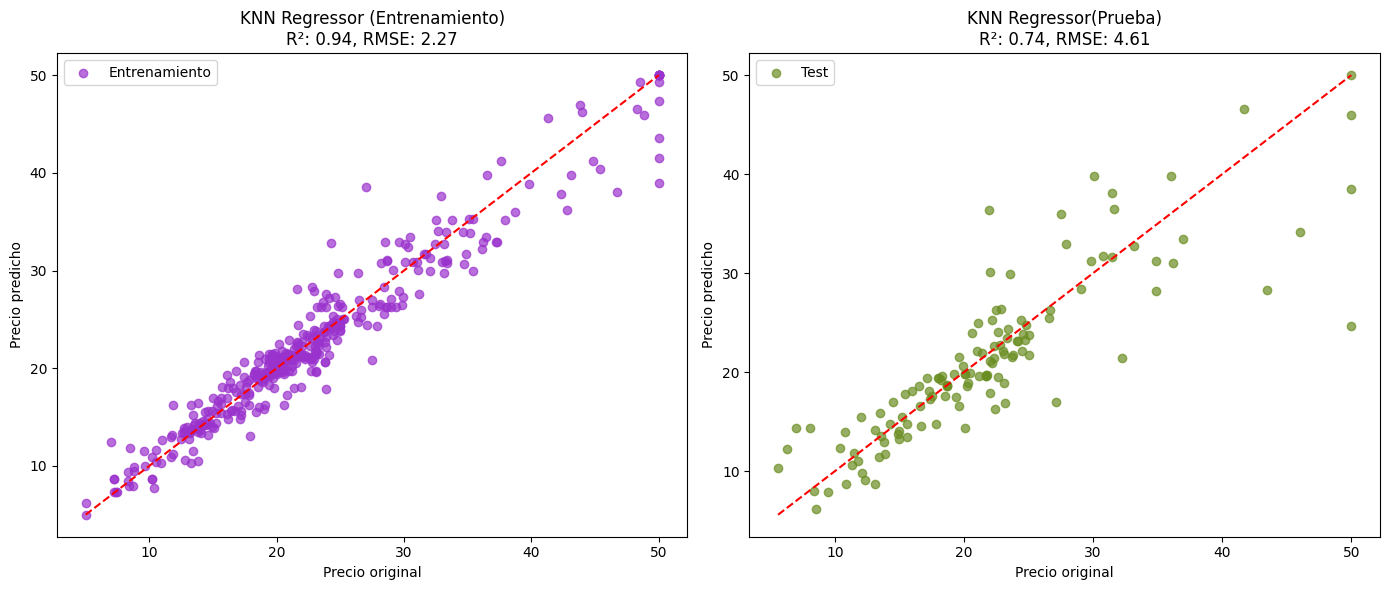

In [289]:
# Predicciones
y_train_pred_knn = grid_knr.predict(X_train)
y_test_pred_knn = grid_knr.predict(X_test)

# Métricas
r2_train_knn = r2_score(y_train, y_train_pred_knn)
r2_test_knn = r2_score(y_test, y_test_pred_knn)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

# Crear gráficas
plt.figure(figsize=(14, 6))

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_knn, label="Entrenamiento", c='#9A32CD', alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color="red")
plt.xlabel("Precio original")
plt.ylabel("Precio predicho")
plt.title(f"KNN Regressor (Entrenamiento)\nR²: {r2_train_knn:.2f}, RMSE: {rmse_train_knn:.2f}")
plt.legend()
# Conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_knn, label = "Test",c = '#6B8E23', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color = "red")
plt.xlabel("Precio original")
plt.ylabel("Precio predicho")
plt.title(f"KNN Regressor(Prueba)\nR²: {r2_test_knn:.2f}, RMSE: {rmse_test_knn:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

#### **Gráfica de resultados para Regresión lineal**

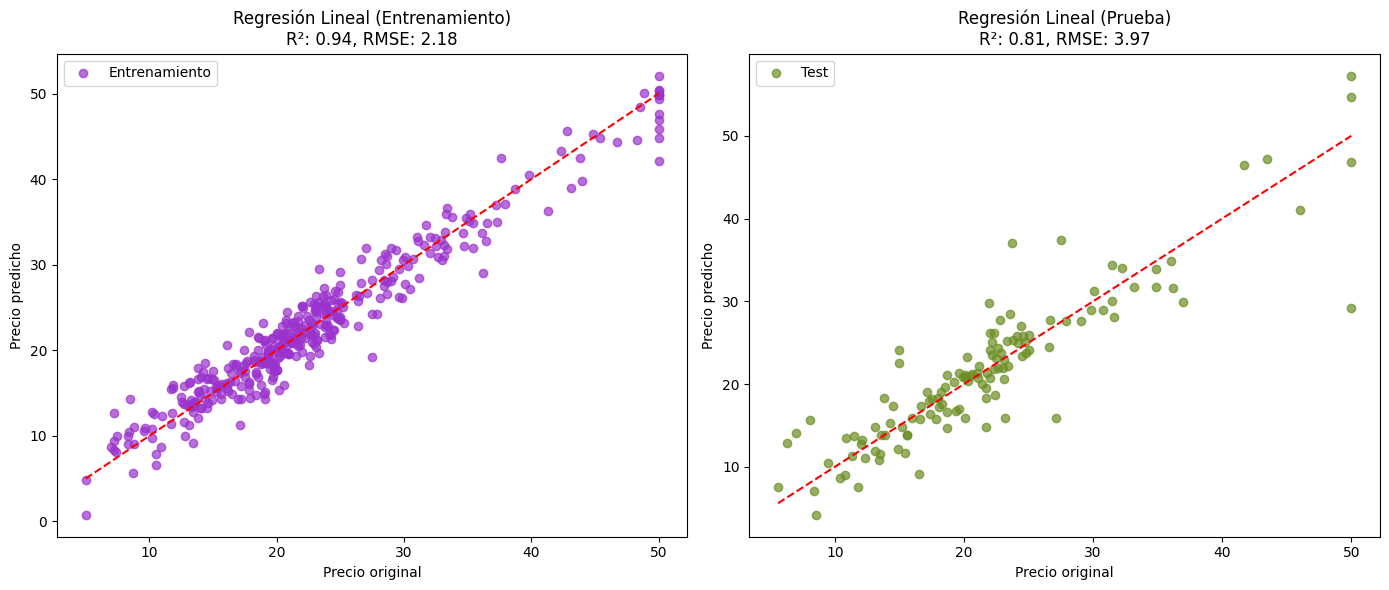

In [288]:
grid_lr.fit(X_train, y_train)
y_train_pred_lr = grid_lr.predict(X_train)
y_test_pred_lr = grid_lr.predict(X_test)

# Métricas
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

plt.figure(figsize=(14, 6))

# Conjunto de entrenamiento
plt.subplot(1, 2, 1) 
plt.scatter(y_train, y_train_pred_lr, label = "Entrenamiento", c = '#9A32CD', alpha = 0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color = 'red')
plt.xlabel("Precio original")
plt.ylabel("Precio predicho")
plt.title(f"Regresión Lineal (Entrenamiento)\nR²: {r2_train_lr:.2f}, RMSE: {rmse_train_lr:.2f}")
plt.legend()

# Conjunto de test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_lr, label = "Test",c = '#6B8E23', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color = 'red')
plt.xlabel("Precio original")
plt.ylabel("Precio predicho")
plt.title(f"Regresión Lineal (Prueba)\nR²: {r2_test_lr:.2f}, RMSE: {rmse_test_lr:.2f}")
plt.legend()

plt.tight_layout()
plt.show()


